#  Data Preprocessing

In [23]:
# Data analysis and manipulation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Resampling the data to address class imbalance
from sklearn.utils import resample

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# Converting categorical labels into one-hot encoded vectors
from tensorflow.keras.utils import to_categorical

# Evaluation metrics for classification model
from sklearn.metrics import classification_report, confusion_matrix

# Deep learning framework for building and training models
import tensorflow as tf

# Ignore warnings to enhance readability
import warnings
warnings.filterwarnings("ignore")


In [24]:
# reading the daimport pandas as pd

# Reading the test dataset
ecg_test = pd.read_csv('data/mitbih_test.csv', header=None)

# Reading the train dataset
ecg_train = pd.read_csv('data/mitbih_train.csv', header=None)

# Displaying the first 10 rows of the train dataset
ecg_train.head(10)

ecg_test = pd.read_csv('data/mitbih_test.csv', header=None)
ecg_train = pd.read_csv('data/mitbih_train.csv', header=None)

ecg_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.423611,0.791667,1.000000,0.256944,0.000000,0.277778,0.465278,0.520833,0.472222,0.555556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.716814,0.539823,0.283186,0.129794,0.064897,0.076696,0.026549,0.032448,0.008850,0.044248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.874214,0.849057,0.480084,0.058700,0.090147,0.310273,0.387841,0.385744,0.389937,0.392034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.996086,0.694716,0.336595,0.238748,0.268102,0.191781,0.174168,0.164384,0.187867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The length of Non-ectopic beats (normal beat) is 72471
The length of Supraventricular ectopic beats is 6431
The length of Ventricular ectopic beats is 5788
The length of Fusion beat is 2223
The length of Unknown Beats is 641


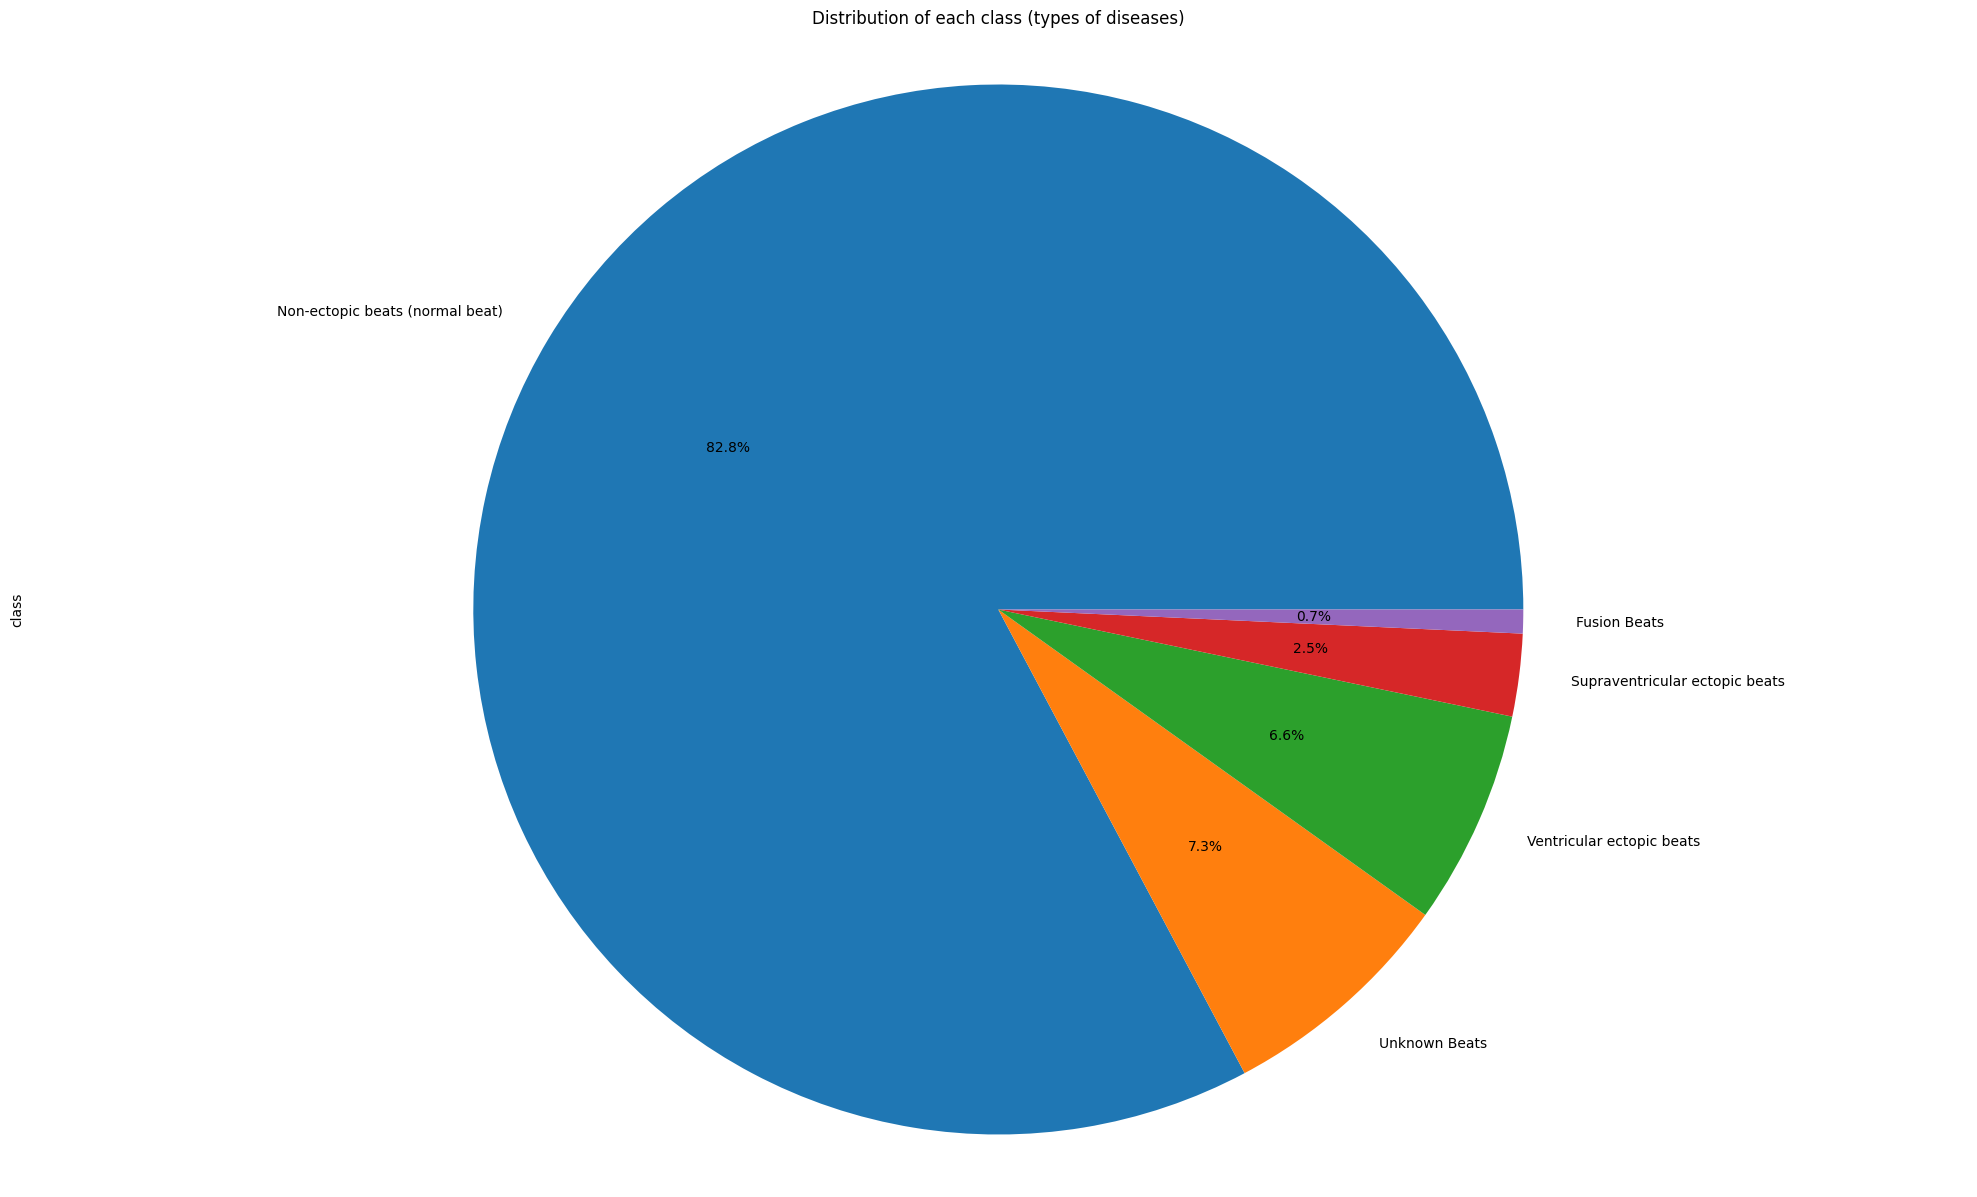

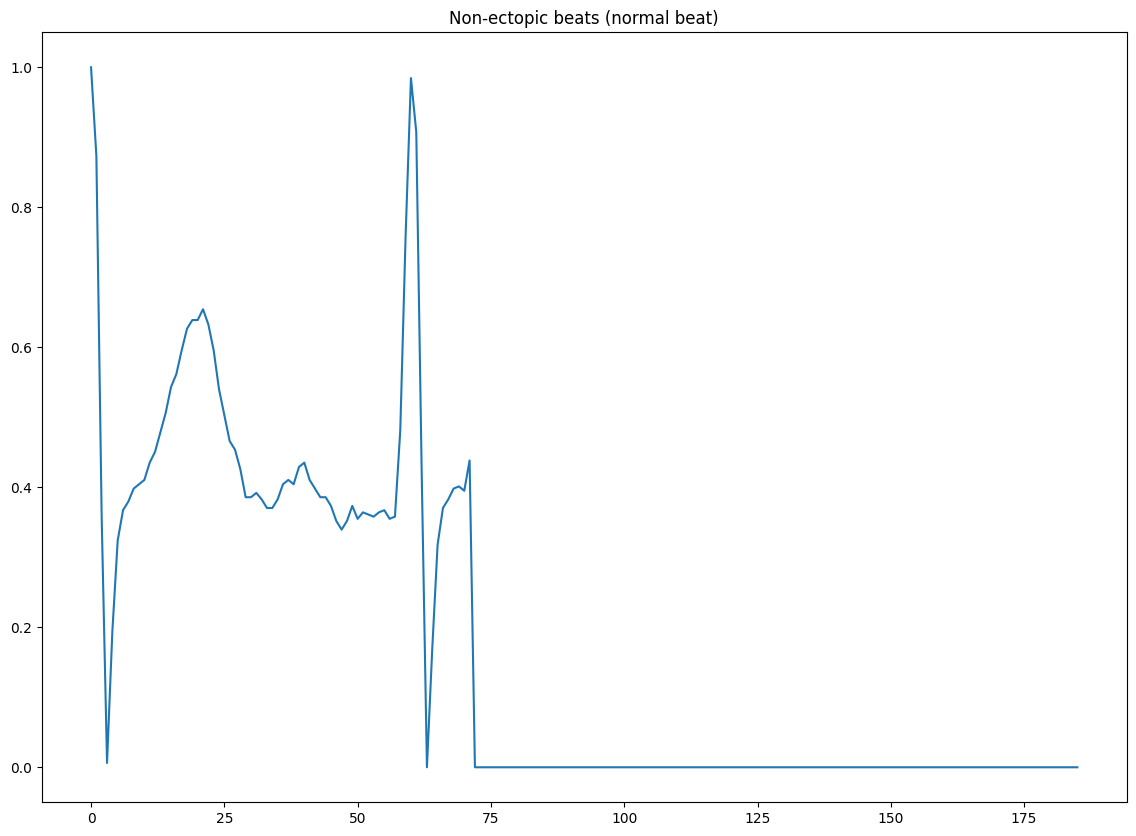

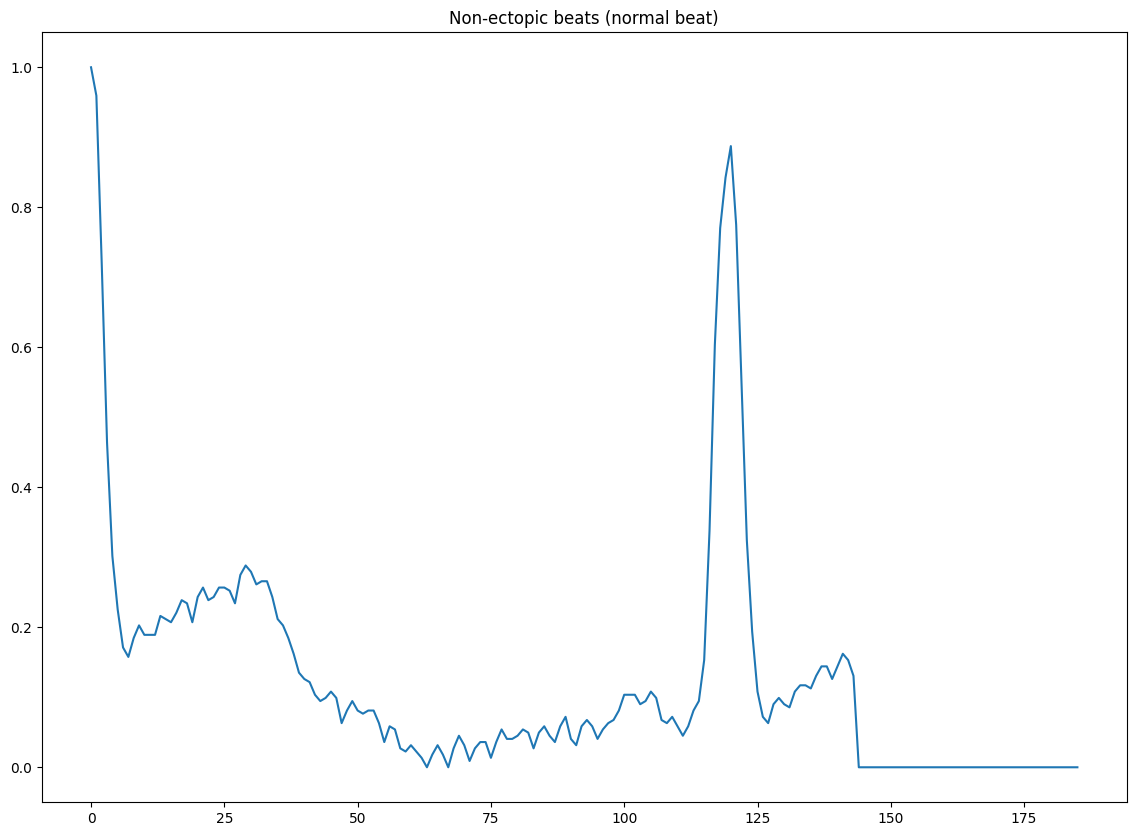

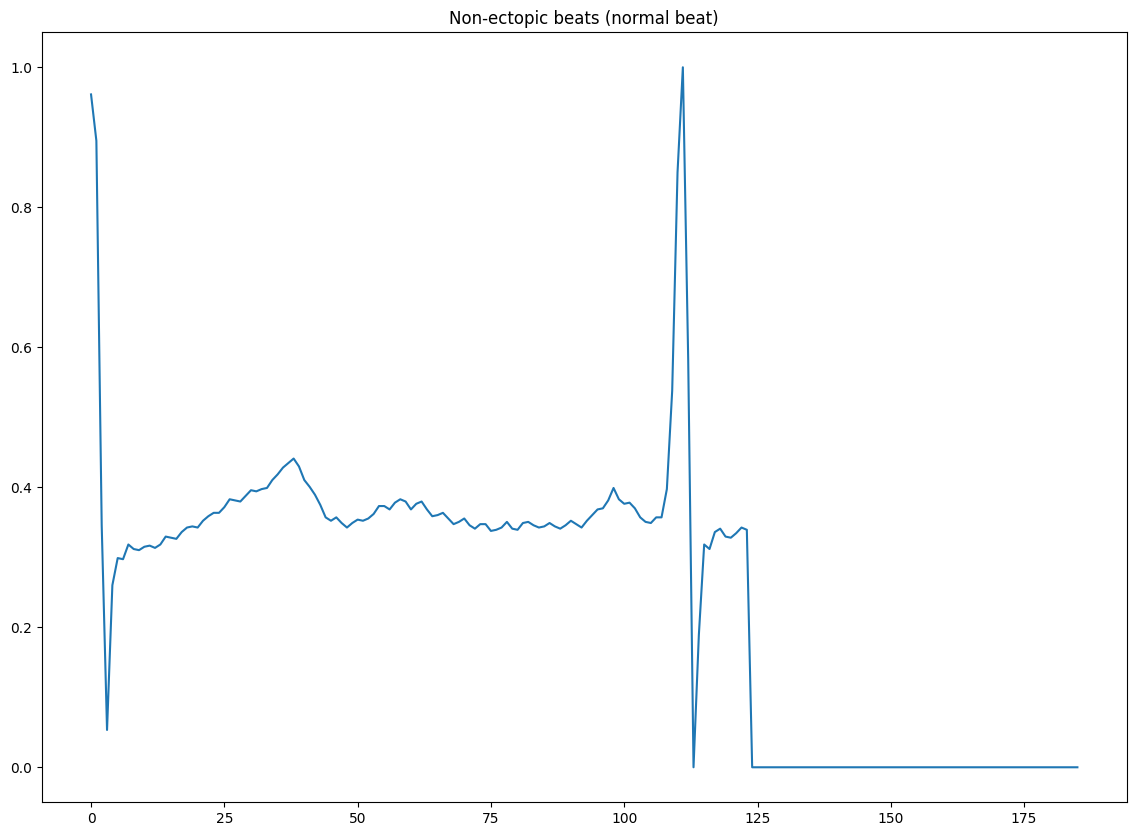

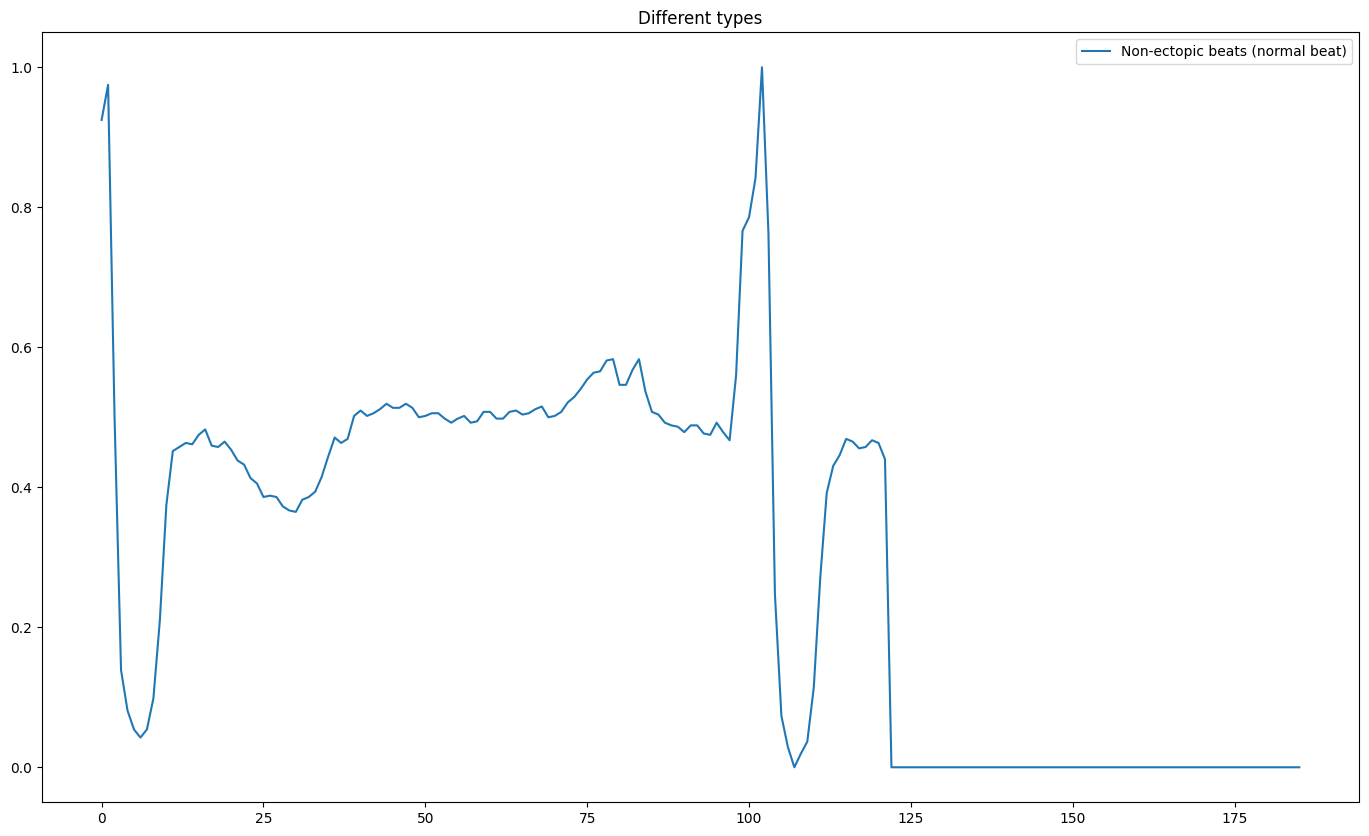

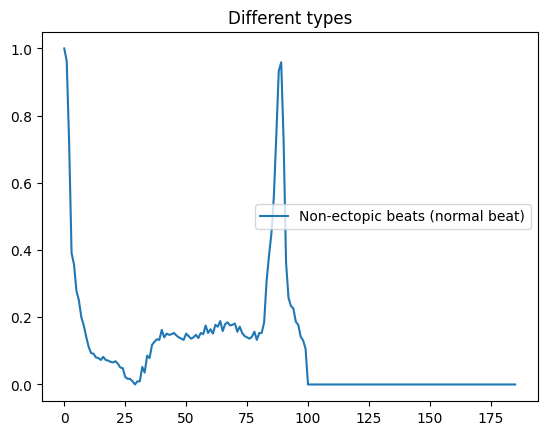

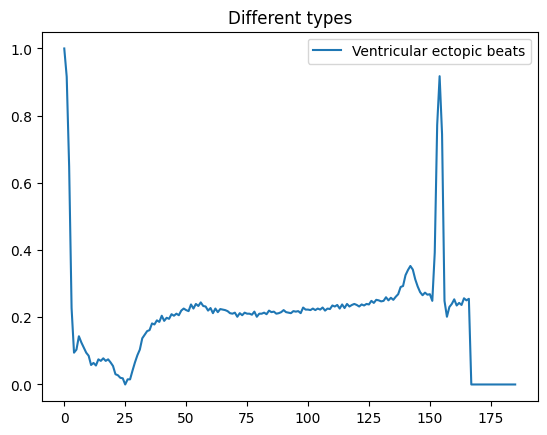

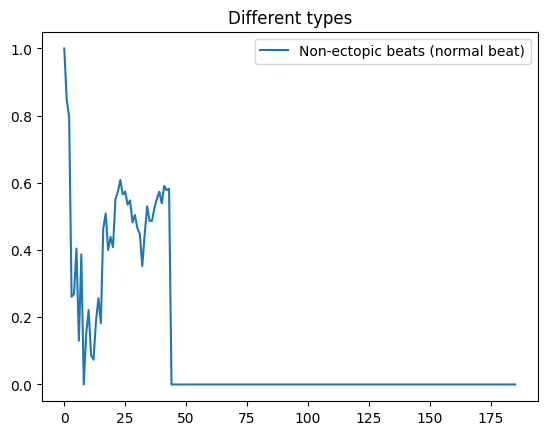

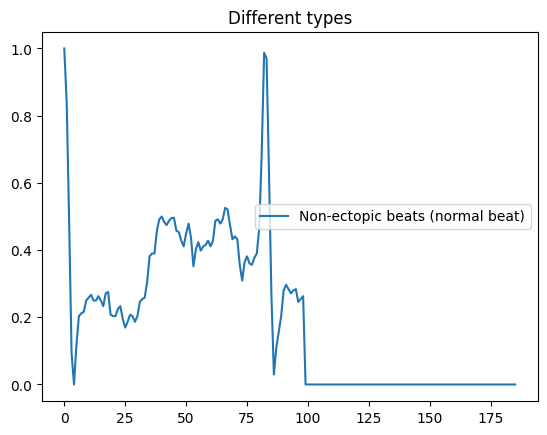

In [25]:
# Converting column 187 of ecg_train to integer type
ecg_train[187] = ecg_train[187].astype(int)

# Counting the occurrences of each class in column 187
counts = ecg_train[187].value_counts()

# Resetting the index and renaming columns for clarity
counts = counts.reset_index()
counts = counts.rename(columns={counts.columns[1]: 'class'})

# Mapping class numbers to class names
classes = {0: 'Non-ectopic beats (normal beat)',
           1: 'Supraventricular ectopic beats',
           2: 'Ventricular ectopic beats',
           3: 'Fusion beat',
           4: 'Unknown Beats'}

# Creating a dictionary to store the counts for each class
class_counts = {}
for class_number, class_name in classes.items():
    class_counts[class_name] = counts['class'][counts.index == class_number].values[0]

# Printing the length of each class
for class_name, count in class_counts.items():
    print('The length of {} is {}'.format(class_name, count))

# Pie chart showing the distribution of each class
plt.figure(figsize=(25, 15))
counts['class'].plot(kind='pie', labels=['Non-ectopic beats (normal beat)',
                                         'Unknown Beats',
                                         'Ventricular ectopic beats',
                                         'Supraventricular ectopic beats',
                                         'Fusion Beats'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of each class (types of diseases)')
plt.show()

# Plotting a few samples from each class
for i in range(3):
    plt.figure(figsize=(14, 10))
    n = ecg_train.sample(1)
    plt.plot(n.iloc[0, :186])
    plt.title(classes[int(n[187])])
    plt.show()

# Plotting samples from different classes in the same plot
plt.figure(figsize=(17, 10))
for i in range(5):
    n = ecg_train.sample(1)
    plt.plot(n.iloc[0, :186], label=classes[int(n[187])])
    plt.title('Different types')
    plt.legend(loc='best')
    plt.show()


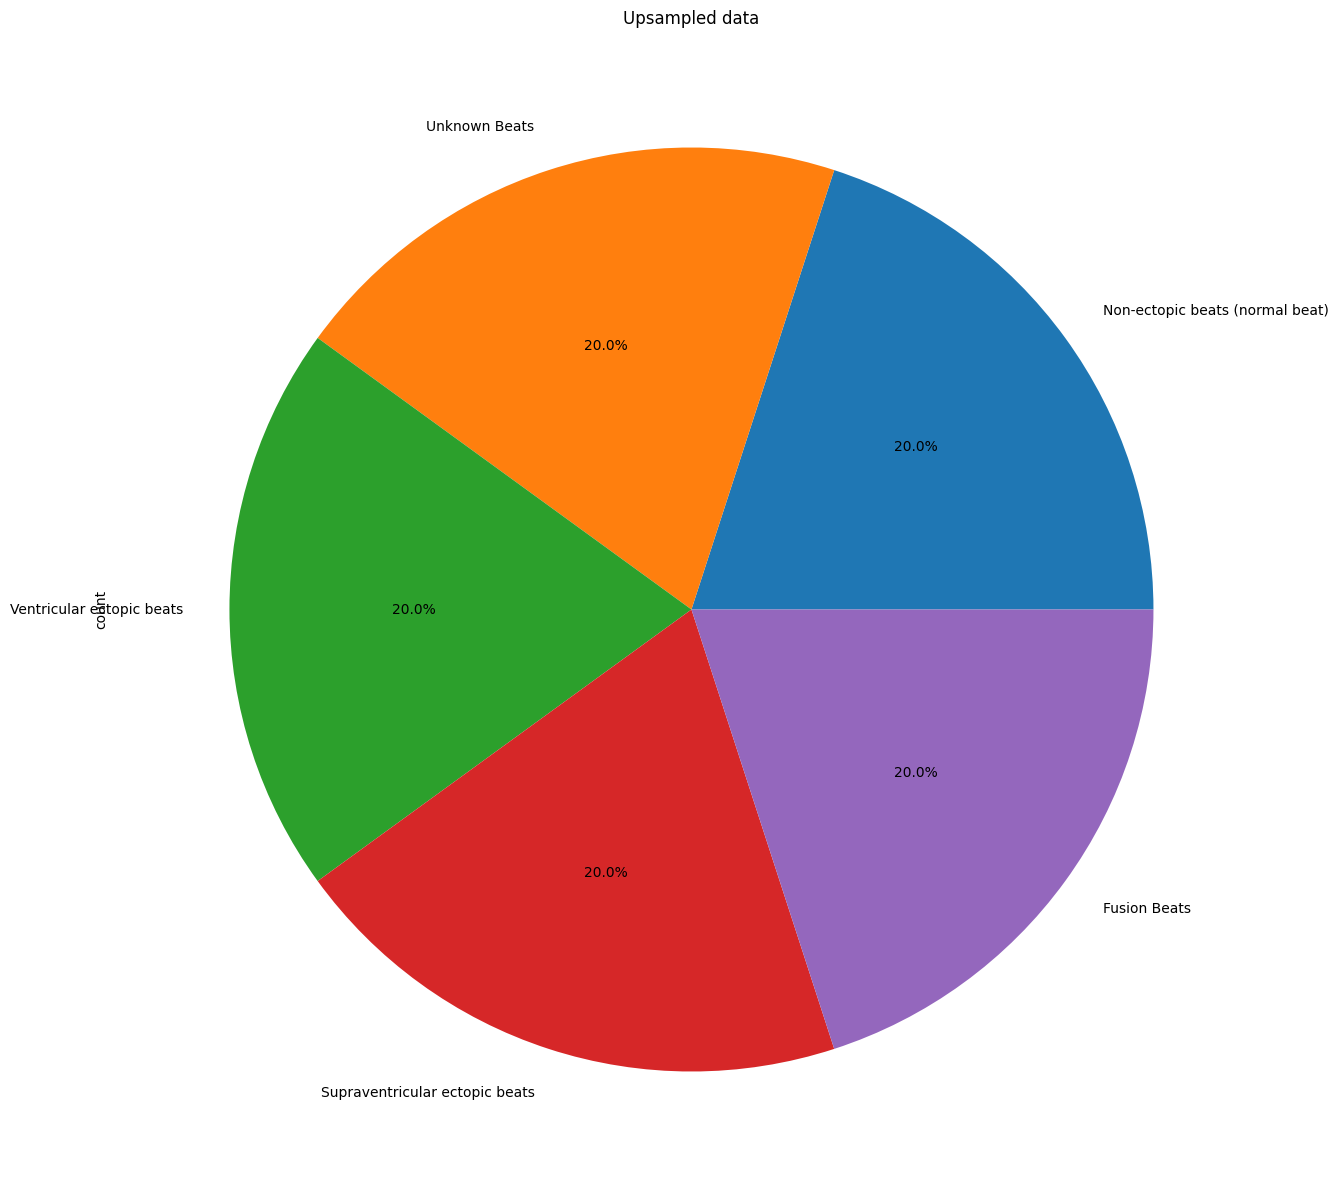

In [26]:
# Creating separate datasets for each class
train_upsample1 = ecg_train[ecg_train[187] == 1]
train_upsample2 = ecg_train[ecg_train[187] == 2]
train_upsample3 = ecg_train[ecg_train[187] == 3]
train_upsample4 = ecg_train[ecg_train[187] == 4]
train_upsample0 = ecg_train[ecg_train[187] == 0].sample(n=10000, random_state=1)

# Upsampling each class to have 10,000 samples
train1_upsample = resample(train_upsample1, replace=True, n_samples=10000, random_state=43)
train2_upsample = resample(train_upsample2, replace=True, n_samples=10000, random_state=44)
train3_upsample = resample(train_upsample3, replace=True, n_samples=10000, random_state=54)
train4_upsample = resample(train_upsample4, replace=True, n_samples=10000, random_state=65)

# Concatenating the upsampled datasets into a new training dataset
new_train = pd.concat([train_upsample0, train1_upsample, train2_upsample, train3_upsample, train4_upsample])

# Converting column 187 of the new training dataset to integer type
new_train[187] = new_train[187].astype(int)

# Counting the occurrences of each class in the new training dataset
counts = new_train[187].value_counts()

# Plotting a pie chart to visualize the distribution of each class in the upsampled data
plt.figure(figsize=(25, 15))
counts.plot(kind='pie', labels=['Non-ectopic beats (normal beat)',
                                'Unknown Beats',
                                'Ventricular ectopic beats',
                                'Supraventricular ectopic beats',
                                'Fusion Beats'], autopct='%1.1f%%')
plt.title("Upsampled data")
plt.show()


# Convolutional Neural Network (ConvNet) Model

In [27]:
class ConvNet(tf.keras.Model):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.conv1 = tf.keras.layers.Conv1D(32, kernel_size=3, activation='tanh', padding='same', input_shape=(186, 1))
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.relu1 = tf.keras.layers.ReLU()
        self.maxpool1 = tf.keras.layers.MaxPool1D(5, padding='same')
        
        self.conv2 = tf.keras.layers.Conv1D(32, kernel_size=7, padding='same')
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.relu2 = tf.keras.layers.ReLU()
        self.maxpool2 = tf.keras.layers.MaxPool1D(5, padding='same')
        
        self.conv3 = tf.keras.layers.Conv1D(64, kernel_size=7, padding='same')
        self.bn3 = tf.keras.layers.BatchNormalization()
        self.relu3 = tf.keras.layers.ReLU()
        self.maxpool3 = tf.keras.layers.MaxPool1D(5, padding='same')
        
        self.conv4 = tf.keras.layers.Conv1D(128, kernel_size=7, padding='same')
        self.bn4 = tf.keras.layers.BatchNormalization()
        self.relu4 = tf.keras.layers.ReLU()
        self.maxpool4 = tf.keras.layers.MaxPool1D(5, padding='same')
        
        self.conv5 = tf.keras.layers.Conv1D(256, kernel_size=7, padding='same')
        self.bn5 = tf.keras.layers.BatchNormalization()
        self.relu5 = tf.keras.layers.ReLU()
        self.maxpool5 = tf.keras.layers.GlobalMaxPooling1D()
        
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(256, activation='relu')
        self.dropout1 = tf.keras.layers.Dropout(0.5)
        self.fc2 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout2 = tf.keras.layers.Dropout(0.5)
        self.fc3 = tf.keras.layers.Dense(64, activation='relu')
        self.dropout3 = tf.keras.layers.Dropout(0.5)
        self.fc4 = tf.keras.layers.Dense(32, activation='relu')
        self.fc5 = tf.keras.layers.Dense(16, activation='relu')
        self.fc6 = tf.keras.layers.Dense(5, activation='softmax')
        
    def call(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)
        
        x = self.conv4(x)
        x = self.bn4(x)
        x = self.relu4(x)
        x = self.maxpool4(x)
        
        x = self.conv5(x)
        x = self.bn5(x)
        x = self.relu5(x)
        x = self.maxpool5(x)
        
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        x = self.fc5(x)
        x = self.fc6(x)
        
        return x

In [28]:
# Data preparation

X = new_train.iloc[:,:186]
y = new_train.iloc[:,187]

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
print('X_train shape is: ', X_train.shape)
print('y_train shape is: ', y_train.shape)
print('X_test shape is: ', X_test.shape)
print('y_test shape is: ', y_test.shape)

X_train shape is:  (40000, 186)
y_train shape is:  (40000, 5)
X_test shape is:  (10000, 186)
y_test shape is:  (10000, 5)


In [30]:
model = ConvNet()
model.build(input_shape=(None, 186, 1))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.summary()

Model: "conv_net_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          multiple                  128       
                                                                 
 batch_normalization_15 (Bat  multiple                 128       
 chNormalization)                                                
                                                                 
 re_lu_15 (ReLU)             multiple                  0         
                                                                 
 max_pooling1d_13 (MaxPoolin  multiple                 0         
 g1D)                                                            
                                                                 
 conv1d_16 (Conv1D)          multiple                  7200      
                                                                 
 batch_normalization_16 (Bat  multiple                 1

In [32]:
# Reshape the input data
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Fit the model
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/30
2500/2500 [==============================] - 15s 5ms/step - loss: 0.6267 - accuracy: 0.7818 - val_loss: 0.3902 - val_accuracy: 0.8644
Epoch 2/30
2500/2500 [==============================] - 13s 5ms/step - loss: 0.3764 - accuracy: 0.8824 - val_loss: 0.3102 - val_accuracy: 0.8897
Epoch 3/30
2500/2500 [==============================] - 14s 5ms/step - loss: 0.3135 - accuracy: 0.9004 - val_loss: 0.3382 - val_accuracy: 0.8866
Epoch 4/30
2500/2500 [==============================] - 13s 5ms/step - loss: 0.2803 - accuracy: 0.9100 - val_loss: 0.2444 - val_accuracy: 0.9165
Epoch 5/30
2500/2500 [==============================] - 13s 5ms/step - loss: 0.2467 - accuracy: 0.9220 - val_loss: 0.2047 - val_accuracy: 0.9320
Epoch 6/30
2500/2500 [==============================] - 14s 6ms/step - loss: 0.2248 - accuracy: 0.9289 - val_loss: 0.1803 - val_accuracy: 0.9356
Epoch 7/30
2500/2500 [==============================] - 13s 5ms/step - loss: 0.2025 - accuracy: 0.9373 - val_loss: 0.1473 - val_ac

# Model Evaluation

Accuracy: 97.27%


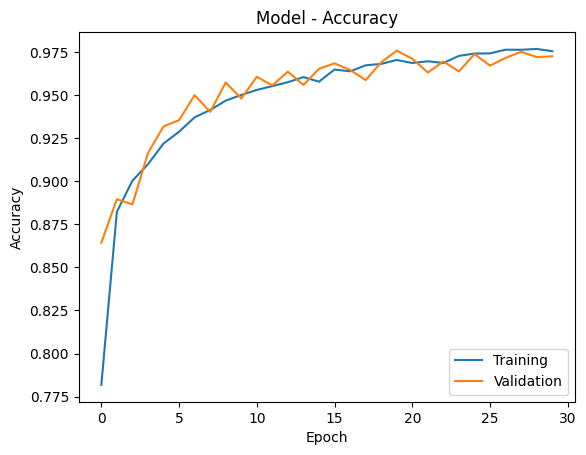

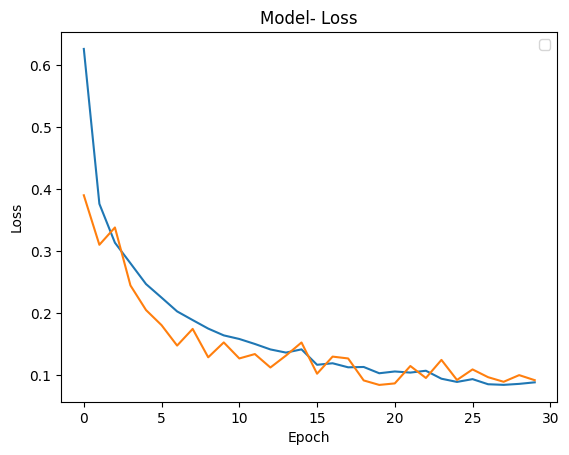

In [33]:
# Evaluate the Model

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

print(history)
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
target_names=['0','1','2','3','4']

313/313 [==============================] - 1s 2ms/step


<Axes: >

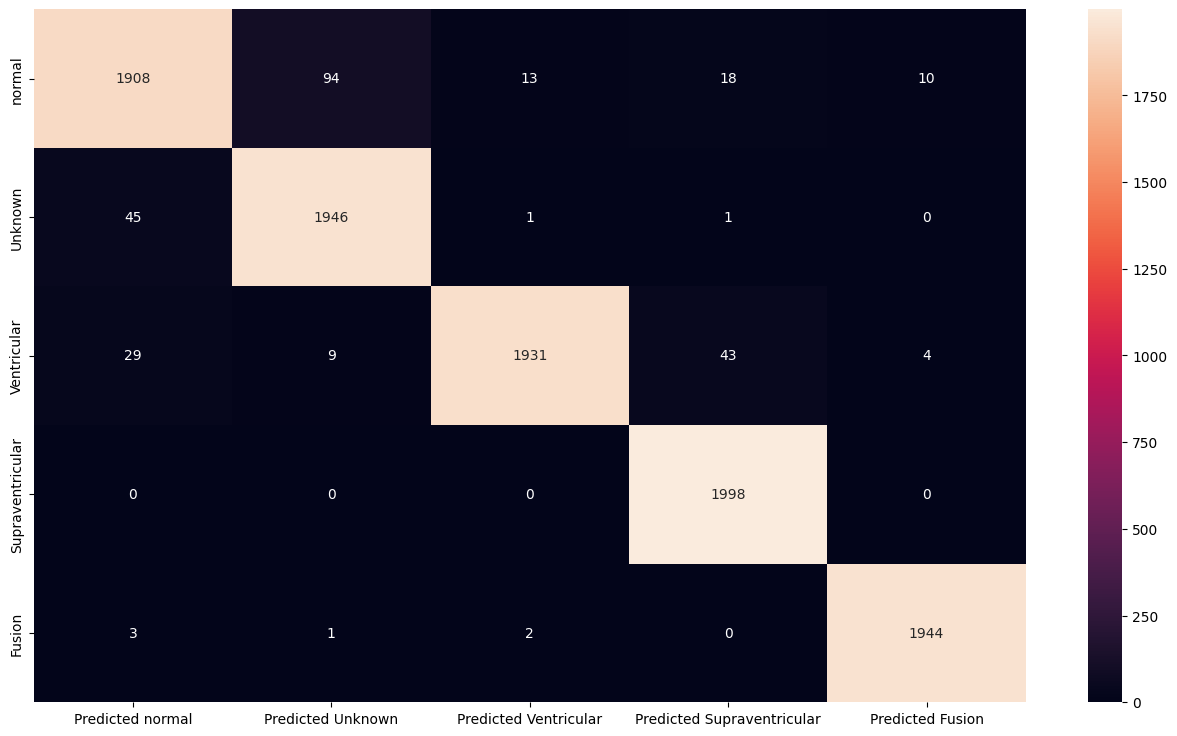

In [34]:
y_true = np.argmax(y_test, axis=1)
prediction_proba = model.predict(X_test)
prediction = np.argmax(prediction_proba, axis=1)
cnf_matrix = confusion_matrix(y_true, prediction)

plt.figure(figsize=(16, 9))
x_axis_labels = ['Predicted normal', 'Predicted Unknown', 'Predicted Ventricular', 'Predicted Supraventricular', 'Predicted Fusion']
y_axis_labels = ['normal', 'Unknown', 'Ventricular', 'Supraventricular', 'Fusion']
sns.heatmap(cnf_matrix, annot=True, fmt="d", xticklabels=x_axis_labels, yticklabels=y_axis_labels)


# Testing on the ecg_test dataset

685/685 [==============================] - 1s 2ms/step
                            precision    recall  f1-score   support

          Predicted normal       0.99      0.94      0.97     18118
         Predicted Unknown       0.39      0.90      0.54       556
     Predicted Ventricular       0.92      0.94      0.93      1448
Predicted Supraventricular       0.44      0.93      0.59       162
          Predicted Fusion       0.97      0.99      0.98      1608

                  accuracy                           0.94     21892
                 macro avg       0.74      0.94      0.80     21892
              weighted avg       0.97      0.94      0.95     21892



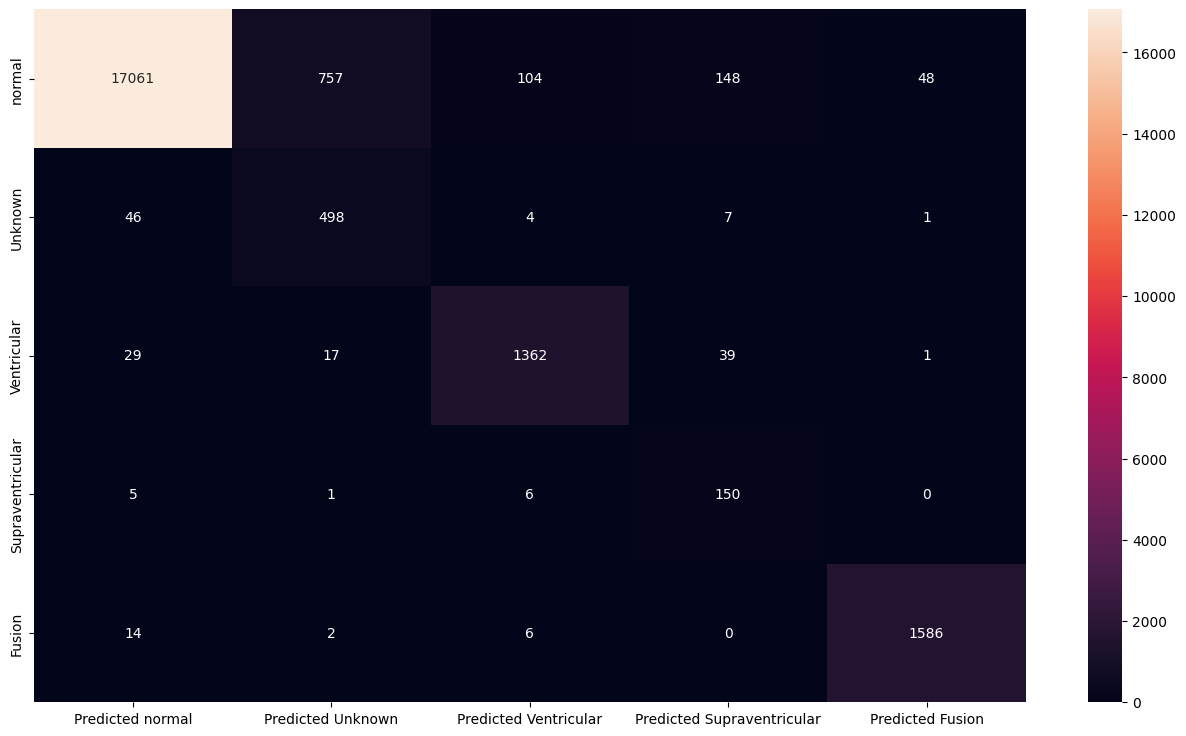

In [35]:
ecg_test[187] = ecg_test[187].astype(int)
counts = ecg_test[187].value_counts()

X_ecg_test = ecg_test.iloc[:, :186]
y_ecg_test = ecg_test.iloc[:, 187]
X_ecg_test = X_ecg_test.values.reshape(-1, 186, 1)

prediction_proba = model.predict(X_ecg_test)
prediction = np.argmax(prediction_proba, axis=1)
cnf_matrix = confusion_matrix(y_ecg_test, prediction)

plt.figure(figsize=(16, 9))
x_axis_labels = ['Predicted normal', 'Predicted Unknown', 'Predicted Ventricular', 'Predicted Supraventricular', 'Predicted Fusion']
y_axis_labels = ['normal', 'Unknown', 'Ventricular', 'Supraventricular', 'Fusion']
sns.heatmap(cnf_matrix, annot=True, fmt="d", xticklabels=x_axis_labels, yticklabels=y_axis_labels)

target_names = ['Predicted normal', 'Predicted Unknown', 'Predicted Ventricular', 'Predicted Supraventricular', 'Predicted Fusion']
print(classification_report(y_ecg_test, prediction, target_names=target_names))
